<a href="https://colab.research.google.com/github/JidapaBur/TH_Avg_HouseholdIncome/blob/main/TH_Avg_HouseholdIncome.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thailand(2011-2023): Analysis of Household Average Monthly Income, Expenses, and GDP
We present the relationship between average monthly income, expenses, and GDP in Thailand (2011-2023) to better understand how economic growth affects people’s earnings and spending habits. By analyzing data, we can see whether higher GDP leads to higher income and expenses or if other factors influence financial stability. We will use correlation analysis to measure how strongly these factors are connected. This will help identify trends in household spending, income growth, and economic well-being. The results of this study can provide useful insights for policymakers, businesses, and individuals to make informed financial and economic decisions.

In [2]:
import sys
import pandas as pd
import numpy as np
import IPython
from IPython.display import display, Markdown, Latex, HTML, IFrame, JSON, Code, Image, YouTubeVideo, clear_output

print( f"Python {sys.version}" )
print( f"Pandas {pd.__version__}" )
print( f"NumPy {np.__version__}" )

Python 3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]
Pandas 2.2.2
NumPy 2.0.2


##Table Data

*   Table of Household Income
*   Table of Household Expense
*   Table of Thailand GDP







###Table of Household Income


In [3]:
url1 = "https://raw.githubusercontent.com/JidapaBur/TH_Avg_HouseholdIncome/main/TH_Avg_HouseholdIncome.csv"
df_income = pd.read_csv(url1)
df1 = df_income[ df_income['REGION'] == 'ทั่วราชอาณาจักร' ] [ ['YEAR', 'REGION', 'MONTHLY_INCOME'] ]
group1 = df1.groupby( ['YEAR', 'REGION'] )
tb1 = group1[['MONTHLY_INCOME'] ].agg('mean').round().reset_index()

display(tb1.head(5))

,YEAR,REGION,MONTHLY_INCOME
0,2554,ทั่วราชอาณาจักร,24457.0
1,2556,ทั่วราชอาณาจักร,26170.0
2,2558,ทั่วราชอาณาจักร,27086.0
3,2560,ทั่วราชอาณาจักร,27184.0
4,2562,ทั่วราชอาณาจักร,26212.0


###Table of Household Expense

In [4]:
url2 = "https://raw.githubusercontent.com/JidapaBur/TH_Avg_HouseholdIncome/main/TH_Avg_HouseholdOutcome.csv"
df_outcome = pd.read_csv(url2)
df2 = df_outcome.loc[ (df_outcome['TYPE_EXPENSE'] == 'ค่าใช้จ่ายทั้งสิ้นต่อเดือน') & (df_outcome['REGION'] == 'ทั่วราชอาณาจักร') ] [ ['YEAR', 'REGION', 'TYPE_EXPENSE','VALUE'] ].reset_index(drop=True)
group2 = df2.groupby( ['YEAR', 'REGION'] )
tb2 = group2[['VALUE'] ].agg('mean').round().reset_index()

display(tb2.head(5))

,YEAR,REGION,VALUE
0,2554,ทั่วราชอาณาจักร,18103.0
1,2556,ทั่วราชอาณาจักร,19756.0
2,2558,ทั่วราชอาณาจักร,21272.0
3,2560,ทั่วราชอาณาจักร,21607.0
4,2562,ทั่วราชอาณาจักร,20893.0


###Table of Thailand GDP

In [251]:
url3 = "https://raw.githubusercontent.com/JidapaBur/TH_Avg_HouseholdIncome/main/TH_GDP.csv"
df_gdp = pd.read_csv(url3)
df_gdp.head()
df3 = df_gdp.loc[ (df_gdp['Yea'] != 'Q1') & (df_gdp['Yea'] != 'Q2') & (df_gdp['Yea'] != 'Q3') & (df_gdp['Yea'] != 'Q4')] [ ['Yea', 'Gross Domestic Product'] ].reset_index(drop=True)

#BE = lambda x: x+543
#df3['Yea'].apply(BE)

df3['Yea'] = df3['Yea'].astype(int)
df3[['YEAR']] = df3[['Yea']].apply(lambda x: x+543)
df3['Gross Domestic Product'] = df3['Gross Domestic Product'].str.replace(',', '').astype(float)
df3[['GDP_Month']] = df3[['Gross Domestic Product']].apply(lambda x: ((x/66)/12)*2.5).round()
df3.head()

tb3 = df3[['YEAR', 'GDP_Month']]

tb3.head(5)

,YEAR,GDP_Month
0,2536,10301.0
1,2537,11645.0
2,2538,13313.0
3,2539,14642.0
4,2540,14868.0


### Merge 3 tables (Income, Expense, GDP)

In [256]:
#Merge Table of income and expense

tb12 = pd.merge(tb1, tb2, on=['YEAR', 'REGION'], how='inner')
tb12 = tb12.reset_index(drop=True)

#Rename Columns
tb_inner = tb12.rename(columns={'MONTHLY_INCOME': 'Income', 'VALUE': 'Expense'})
tb14 = tb_inner[[ 'YEAR', 'Income', 'Expense']]
tb14['Gap'] = tb14['Income'] - tb14['Expense']

#Merge Table of GDP
tb13 = pd.merge(tb14, tb3, on=['YEAR'], how='inner')
tb13 = tb13.rename(columns={'Income':'INCOME_Month', 'Expense':'EXPENSE_Month'})
tb = tb13[[ 'YEAR', 'INCOME_Month', 'EXPENSE_Month', 'GDP_Month']]
tb['Gap'] = tb['INCOME_Month'] - tb['EXPENSE_Month']
tb['YEAR'] = tb['YEAR'].apply(lambda x: x-543)

display(tb.head(10))

,YEAR,INCOME_Month,EXPENSE_Month,GDP_Month,Gap
0,2011,24457.0,18103.0,35691.0,6354.0
1,2013,26170.0,19756.0,40768.0,6414.0
2,2015,27086.0,21272.0,43382.0,5814.0
3,2017,27184.0,21607.0,48891.0,5577.0
4,2019,26212.0,20893.0,53312.0,5319.0
5,2021,27537.0,21763.0,51100.0,5774.0
6,2023,29165.0,23802.0,56572.0,5363.0


## 1.Trend Analysis

In [131]:
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
import plotly

print( f"Matplotlib {mpl.__version__}" )
print( f"Matplotlib backend: {mpl.get_backend()}")
print(f'Pandas {pd.__version__} [Plotting backend = {pd.options.plotting.backend}]')
print(f'Plotly {plotly.__version__}')

# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use('seaborn-v0_8')   # The 'seaborn' style is deprecated, 'ggplot'

Matplotlib 3.10.0
Matplotlib backend: module://matplotlib_inline.backend_inline
Pandas 2.2.2 [Plotting backend = matplotlib]
Plotly 5.24.1


### Graph1: Income vs Expense vs GDP

<Figure size 3750x1250 with 0 Axes>

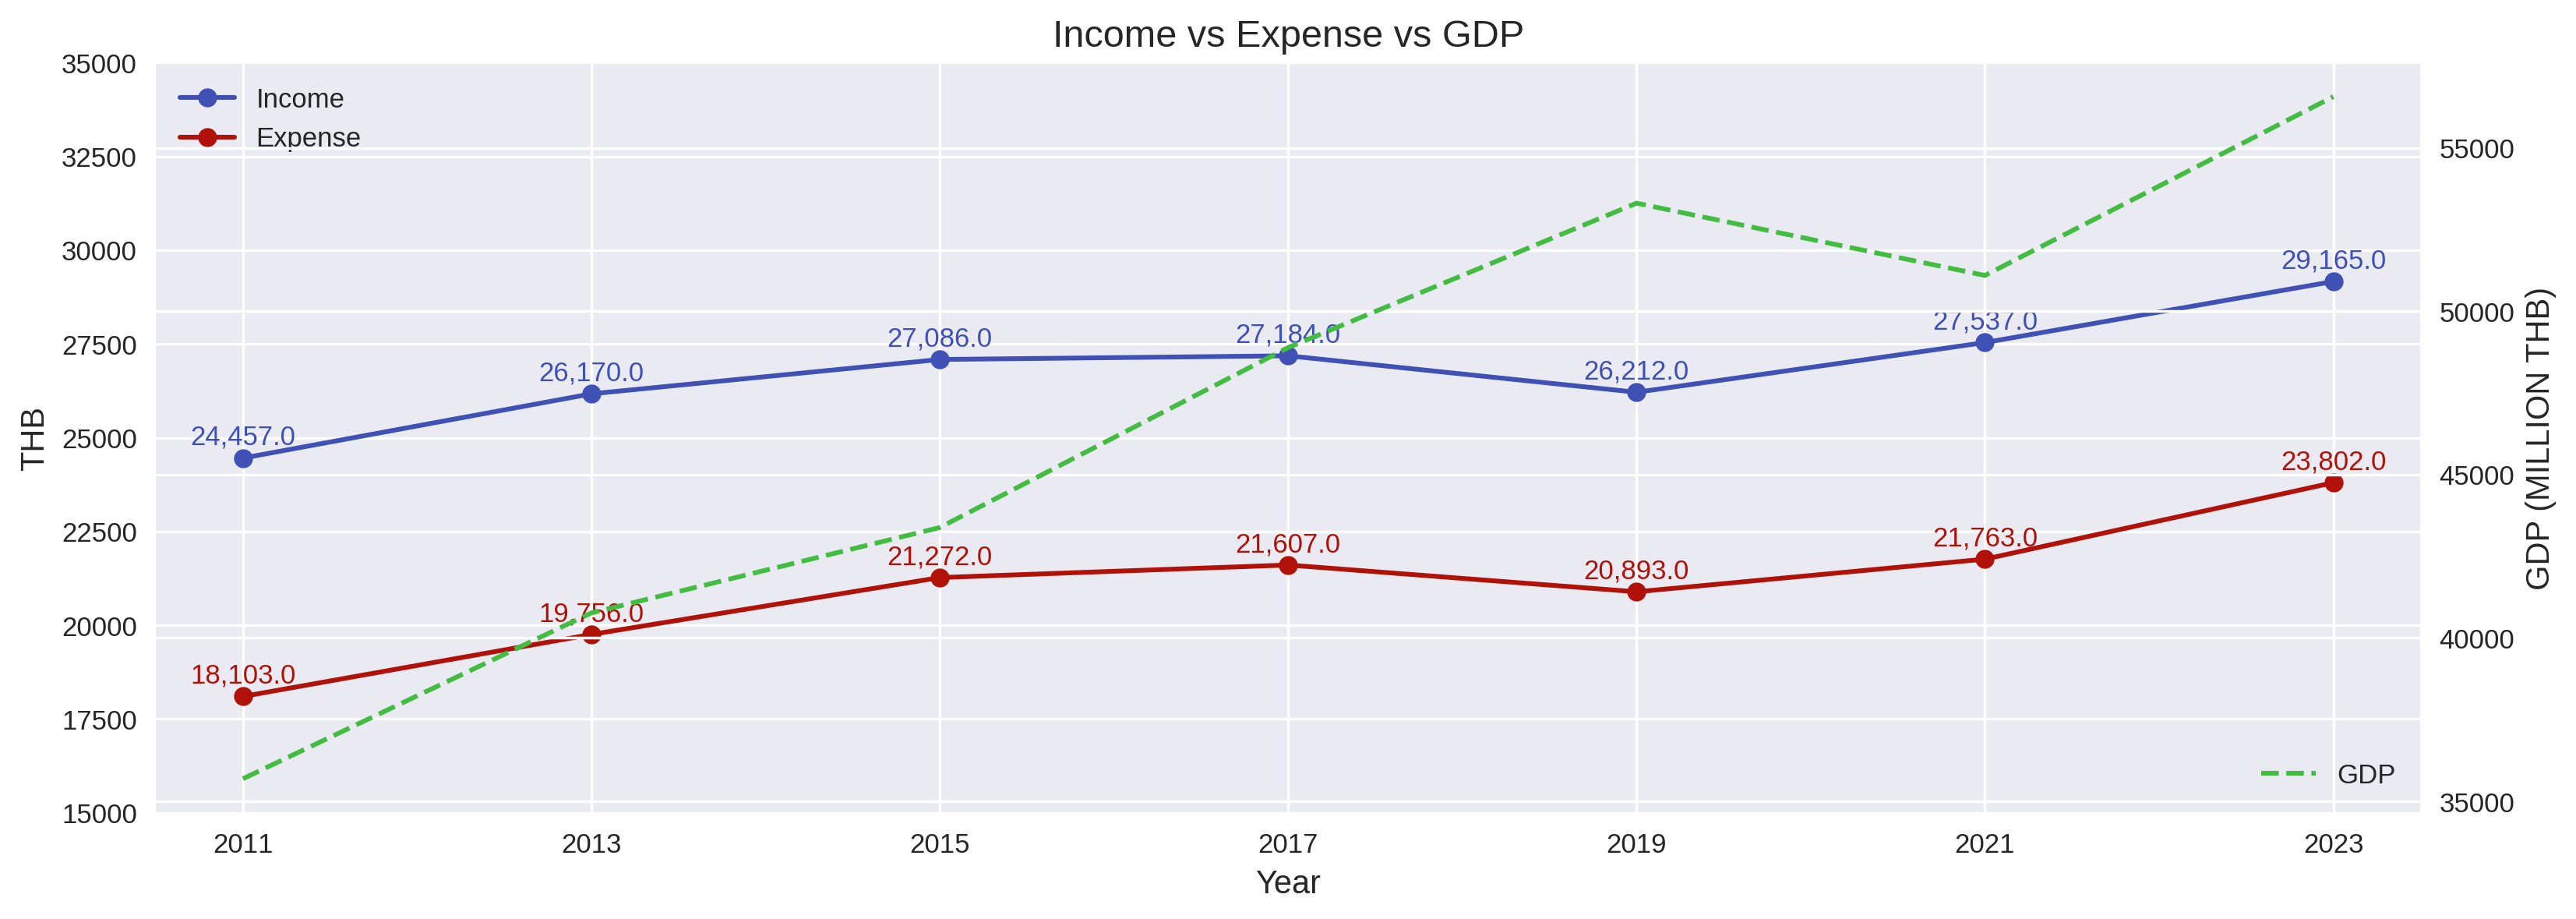

In [263]:
plt.figure(figsize=(15, 5), dpi=250)
fig, ax1 = plt.subplots(figsize=(15, 5), dpi=250)

# Plot: Alternative 1
ax1.plot(tb['YEAR'], tb['INCOME_Month'], color='#3f51b5', marker='o', label='Income')
ax1.plot(tb['YEAR'], tb['EXPENSE_Month'], color='#b0120a', marker='o', label='Expense')

# Create a second y-axis for GDP
ax2 = ax1.twinx()
ax2.plot(tb['YEAR'], tb['GDP_Month'], color='#42bd41', linestyle='--', label='GDP')

# Customize y-axis limits
ax1.set_ylim(15000, 35000)
ax1.set_ylabel('THB', fontsize=12)  # Set label for the first y-axis

# Annotate the data points for Income and Expense
for i, txt in enumerate(tb['INCOME_Month']):
    ax1.annotate(f'{txt:,.1f}', (tb['YEAR'][i], tb['INCOME_Month'][i]), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=10, color='#3f51b5')

for i, txt in enumerate(tb['EXPENSE_Month']):
    ax1.annotate(f'{txt:,.1f}', (tb['YEAR'][i], tb['EXPENSE_Month'][i]), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=10, color='#b0120a')

#for i, txt in enumerate(tb['GDP_Month']):
#    ax2.annotate(f'{txt:,.1f}', (tb['YEAR'][i], tb['GDP_Month'][i]), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=10, color='#42bd41')

# Set titles and labels
ax1.set_title("Income vs Expense vs GDP", fontsize=14)
ax1.set_xlabel("Year", fontsize=12)
ax2.set_ylabel("GDP (MILLION THB)", fontsize=12)
ax1.legend(loc="upper left")
ax2.legend(loc="lower right")
plt.xlim(min(tb['YEAR'])-0.5, max(tb['YEAR'])+0.5)
plt.xticks(tb['YEAR'].unique())
# Show the plot
plt.show()


### Graph2: Expense Ratios (%)



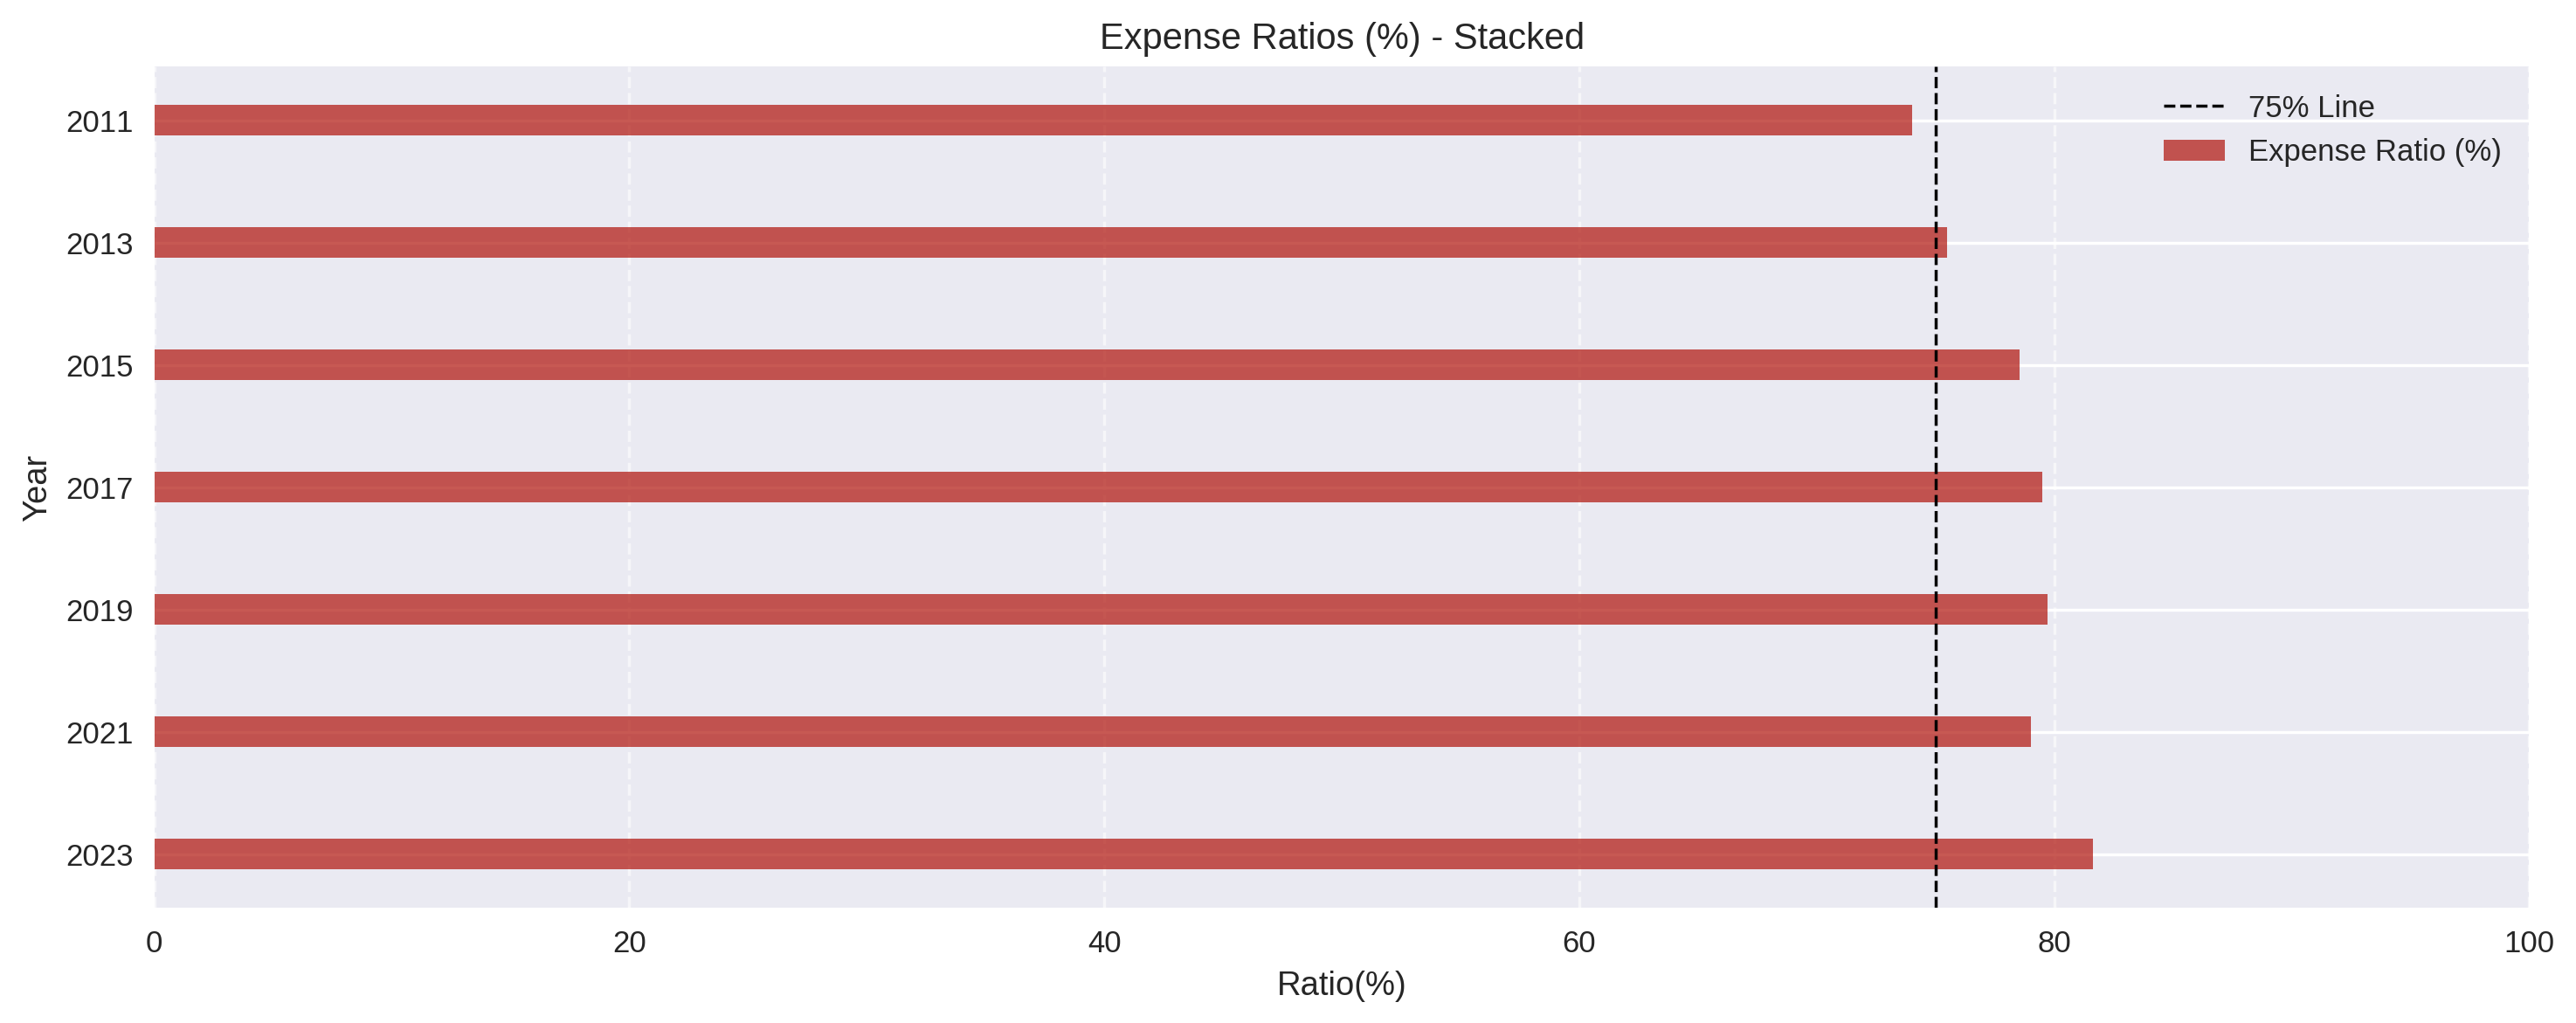

In [274]:
#tb['INCOME_Ratio_Percent'] = (tb['INCOME_Month']) / (tb['INCOME_Month'] + tb['EXPENSE_Month'])
tb['EXPENSE_Ratio_Percent'] = (tb['EXPENSE_Month']) / (tb['INCOME_Month'])

plt.figure(figsize=(15, 5), dpi=250)
bar_width = 0.5  # custom width bar

# plt.barh(tb['YEAR'], tb['INCOME_Ratio_Percent'] * 100, height=bar_width, label='Income Ratio (%)', color='#3f51b5', alpha=0.7)
plt.barh(tb['YEAR'], tb['EXPENSE_Ratio_Percent'] * 100, height=bar_width, label='Expense Ratio (%)', color='#b0120a', alpha=0.7)

# Added Line
plt.axvline(x=75, color='black', linestyle='--', linewidth=1, label='75% Line')

# Custom space graph
plt.subplots_adjust(right=0.85)

plt.xlabel('Ratio(%)')
plt.ylabel('Year')
plt.title('Expense Ratios (%) - Stacked')
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.yticks(sorted(tb['YEAR'].unique()))
plt.xlim(0,100)
plt.gca().invert_yaxis()

plt.show()



### Graph3: Income vs Expense vs Gap


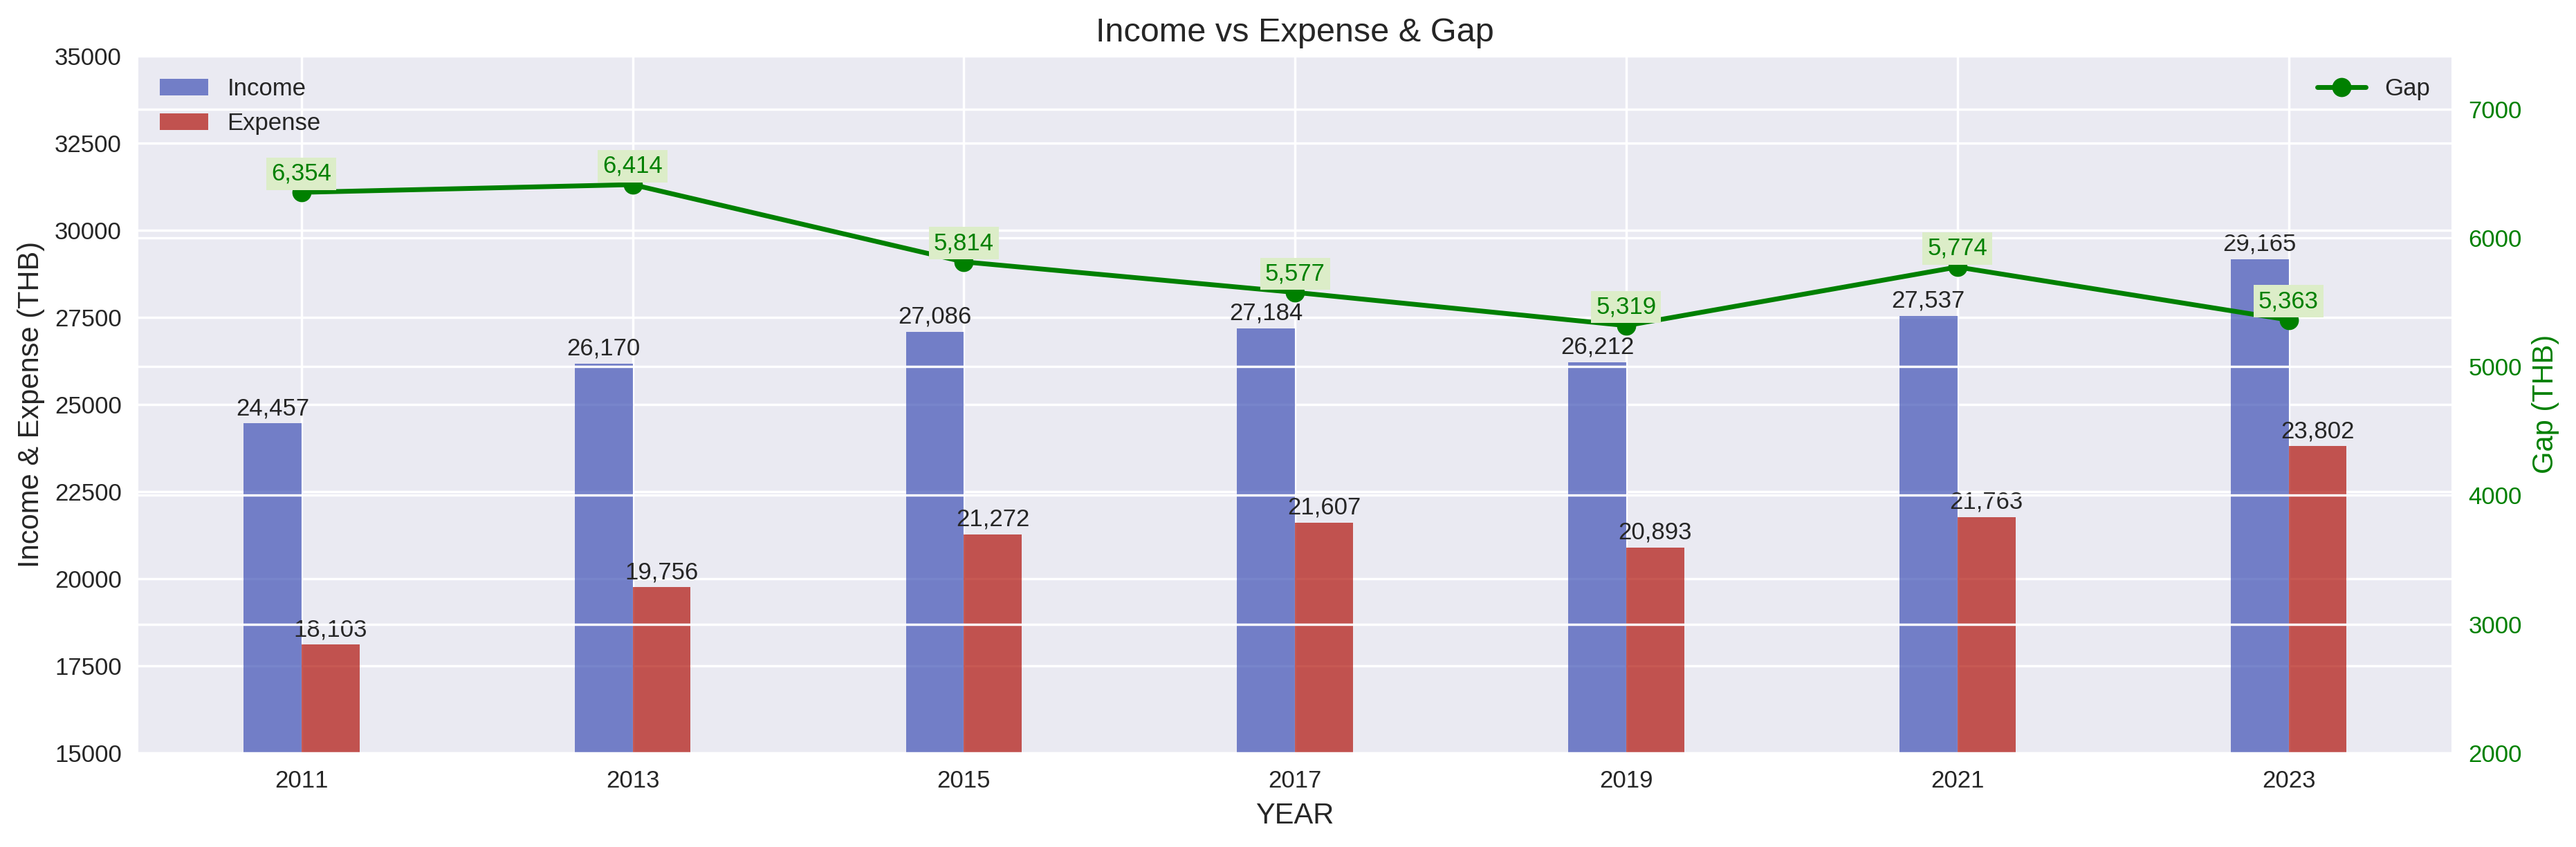

In [264]:
# Figure setting
fig, ax1 = plt.subplots(figsize=(15, 5), dpi=250)

bar_width = 0.35  # custom width bar

# plot Income
ax1.bar(tb['YEAR'] - bar_width/2, tb['INCOME_Month'], width=bar_width, color='#3f51b5', alpha=0.7, label='Income')

# plot Expense
ax1.bar(tb['YEAR'] + bar_width/2, tb['EXPENSE_Month'], width=bar_width, color='#b0120a', alpha=0.7, label='Expense')

ax1.set_ylabel("Income & Expense (THB)", fontsize=12)
ax1.set_xlabel("YEAR", fontsize=12)

# Show values: Income
for i, val in enumerate(tb['INCOME_Month']):
    ax1.text(tb['YEAR'][i] - bar_width/2, val + 100, f'{val:,.0f}', ha='center', va='bottom', fontsize=10)

# Show values: Expense
for i, val in enumerate(tb['EXPENSE_Month']):
    ax1.text(tb['YEAR'][i] + bar_width/2, val + 100, f'{val:,.0f}', ha='center', va='bottom', fontsize=10)

ax1.set_ylim(15000, 35000) #custom y1 limit

# create y2: Gap
ax2 = ax1.twinx()

# Plot Gap
ax2.plot(tb['YEAR'], tb['Gap'], marker='o', color='green', linewidth=2, linestyle='-', label='Gap', markersize=8, zorder=3)

# Custom Scale y2
ax2.set_ylim(2000, max(tb['Gap']) + 1000)
ax2.set_ylabel("Gap (THB)", fontsize=12, color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Show values: Gap
for i, txt in enumerate(tb['Gap']):
    ax2.annotate(f'{txt:,.0f}', (tb['YEAR'][i], tb['Gap'][i]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=10, color='green',bbox=dict(facecolor='#dcedc8', edgecolor='none', pad=2))

# Show Legend
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.title("Income vs Expense & Gap", fontsize=14)
plt.xticks(tb['YEAR'])  # custom x-axis
plt.setp(ax1.get_xticklabels(), rotation=0, horizontalalignment='center')
plt.tight_layout()  # custom layout
plt.show()

## 2.The Ratio of Income-Expense to GDP

Calculate the Ratio of Income-Expenses to GDP

   - Formula

           Average Income Ratio to GDP = (Average Monthly Income x 12) / GDP per Household

           Average Expense Ratio to GDP = (Average Monthly Expenses x 12) / GDP per Household

   - If the expense ratio is higher than the income ratio, it may reflect an increase in household debt.

### Table: Calculate the Ratio of Income-Expenses to GDP

In [258]:
# Calculate (Year)
tb['INCOME_Year'] = tb['INCOME_Month'] * 12
tb['EXPENSE_Year'] = tb['EXPENSE_Month'] * 12
tb['GDP_Year'] = tb['GDP_Month'] * 12

# Calculate (GDP_Ratio)
tb['INCOME_GDP_Ratio'] = tb['INCOME_Year'] / tb['GDP_Year']
tb['EXPENSE_GDP_Ratio'] = tb['EXPENSE_Year'] / tb['GDP_Year']

# Calculate (DIFF_INCOME_EXPENSE)
tb['DIFF_INCOME_EXPENSE'] = tb['INCOME_Month'] - tb['EXPENSE_Month']

# Calculate (DEBT_RISK)
tb['HOUSEHOLD_DEBT_RISK'] = tb.apply(
    lambda row: "May reflect" if row['EXPENSE_GDP_Ratio'] > row['INCOME_GDP_Ratio'] else "Not reflect",
    axis=1
)

tb['DEBT_RISK_LEVEL'] = tb.apply(
    lambda row: "High" if (row['EXPENSE_GDP_Ratio'] > row['INCOME_GDP_Ratio'] * 1.05 and row['DIFF_INCOME_EXPENSE'] < 5000) else ("Medium" if row['EXPENSE_GDP_Ratio'] > row['INCOME_GDP_Ratio'] else "Low"),
    axis=1
)

display(tb.head(10))

,YEAR,INCOME_Month,EXPENSE_Month,GDP_Month,Gap,INCOME_Year,EXPENSE_Year,GDP_Year,INCOME_GDP_Ratio,EXPENSE_GDP_Ratio,DIFF_INCOME_EXPENSE,HOUSEHOLD_DEBT_RISK,DEBT_RISK_LEVEL
0,2011,24457.0,18103.0,35691.0,6354.0,293484.0,217236.0,428292.0,0.685243,0.507215,6354.0,Not reflect,Low
1,2013,26170.0,19756.0,40768.0,6414.0,314040.0,237072.0,489216.0,0.641925,0.484596,6414.0,Not reflect,Low
2,2015,27086.0,21272.0,43382.0,5814.0,325032.0,255264.0,520584.0,0.624360,0.490342,5814.0,Not reflect,Low
3,2017,27184.0,21607.0,48891.0,5577.0,326208.0,259284.0,586692.0,0.556012,0.441942,5577.0,Not reflect,Low
4,2019,26212.0,20893.0,53312.0,5319.0,314544.0,250716.0,639744.0,0.491672,0.391901,5319.0,Not reflect,Low
5,2021,27537.0,21763.0,51100.0,5774.0,330444.0,261156.0,613200.0,0.538885,0.425890,5774.0,Not reflect,Low
6,2023,29165.0,23802.0,56572.0,5363.0,349980.0,285624.0,678864.0,0.515538,0.420738,5363.0,Not reflect,Low


### Graph4: Income and Expense Ratios to GDP per Year (%)

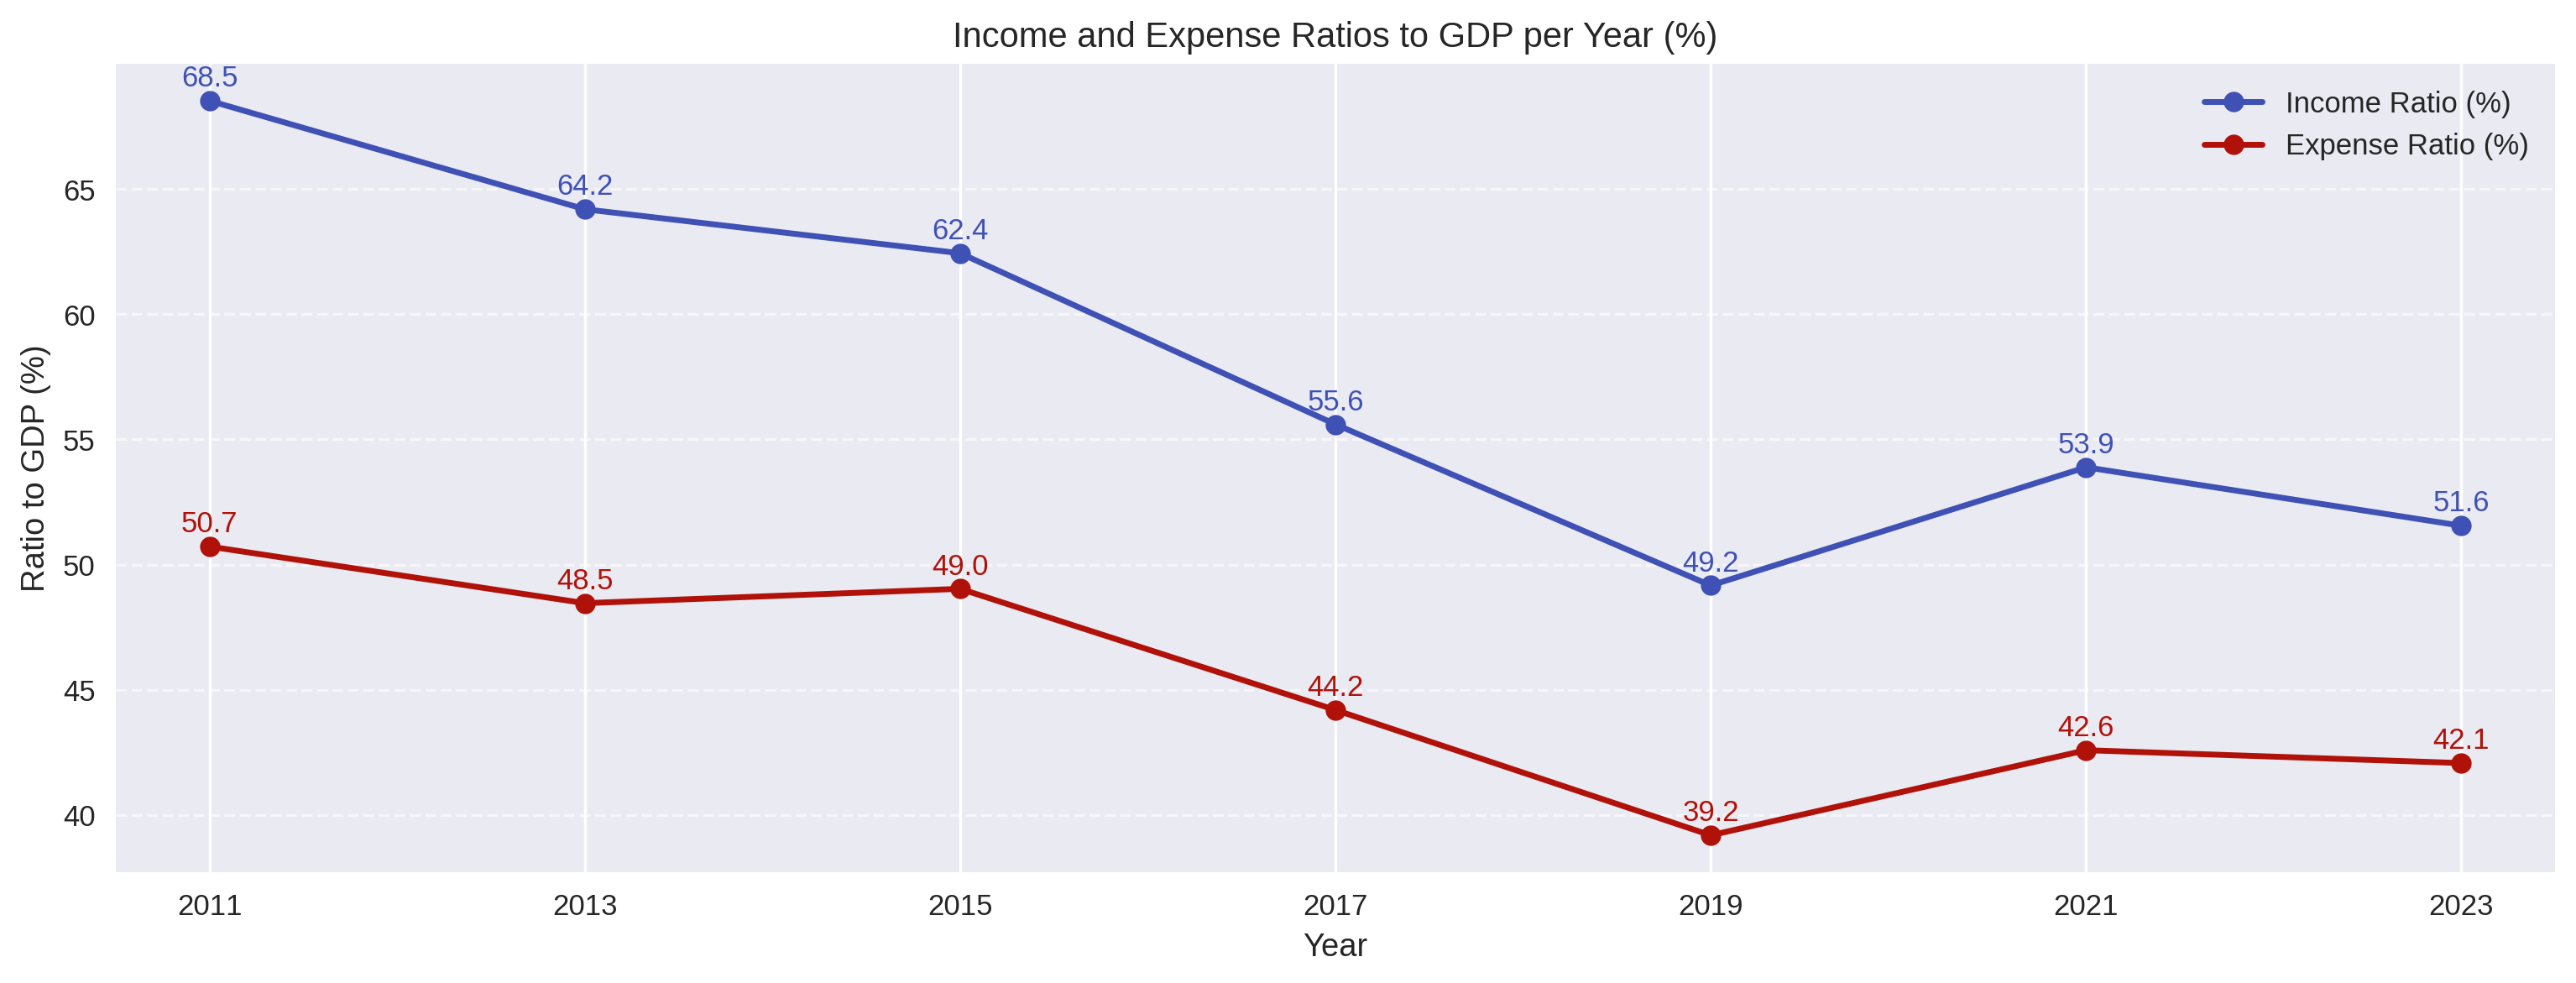

In [273]:
# Calculate Formula
tb['INCOME_GDP_Ratio_Percent'] = (tb['INCOME_Month'] * 12) / tb['GDP_Year'] * 100
tb['EXPENSE_GDP_Ratio_Percent'] = (tb['EXPENSE_Month'] * 12) / tb['GDP_Year'] * 100

# Figure setting
plt.figure(figsize=(15, 5), dpi=250)
ax = plt.gca()

# Plot
plt.plot(tb['YEAR'], tb['INCOME_GDP_Ratio_Percent'], label='Income Ratio (%)', color='#3f51b5', marker='o', linestyle='-', linewidth=2)
plt.plot(tb['YEAR'], tb['EXPENSE_GDP_Ratio_Percent'], label='Expense Ratio (%)', color='#b0120a', marker='o', linestyle='-', linewidth=2)

# Annotate
for i, txt in enumerate(tb['INCOME_GDP_Ratio_Percent']):
    ax.annotate(f'{txt:,.1f}', (tb['YEAR'][i], tb['INCOME_GDP_Ratio_Percent'][i]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=10, color='#3f51b5')

for i, txt in enumerate(tb['EXPENSE_GDP_Ratio_Percent']):
    ax.annotate(f'{txt:,.1f}', (tb['YEAR'][i], tb['EXPENSE_GDP_Ratio_Percent'][i]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=10, color='#b0120a')

# Custom label
plt.xlabel('Year')
plt.ylabel('Ratio to GDP (%)')
plt.title('Income and Expense Ratios to GDP per Year (%)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xlim(min(tb['YEAR'])-0.5, max(tb['YEAR'])+0.5)
plt.xticks(tb['YEAR'].unique())

plt.show()

